# **A tener en cuenta**


Este notebook está configurado para ejecutar instrucciones de R de forma directa (puedes descargar el notebook y abrirlo en un editor de texto normal para que compruebes la especificación del kernel en los metadatos).


# **Paquetes necesarios**

*   **factoextra:** contiene funciones para extraer y visualizar la salida de diferentes análisis de datos multivariantes (análisis de componentes principales, clustering jerárquico ...).
*   **tidyverse:** colección de paquetes para ciencia de datos (dplyr, tidyr, ggplot2 ... )
*   **cluster:** contiene métodos para análisis cluster.
*   **dendextend:** contiene funciones para visualizar y comparar dendrogramas.

















# **Preliminares**

Instalamos los paquetes factoextra, tidyverse, cluster y dendextend. 

In [1]:
install.packages("factoextra")
library(factoextra)
install.packages("cluster")
library(cluster)
install.packages("tidyverse")
library(tidyverse)
install.packages("dendextend")
library(dendextend)

Installing package into ‘/home/fleppy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Installing package into ‘/home/fleppy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/fleppy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rmarkdown’, ‘dbplyr’, ‘modelr’, ‘reprex’, ‘rvest’


── Attaching packages ───────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/home/fleppy/R/x86_64-pc-linux-gnu-library/3.6’
(as

# **Carga y preparación de datos**

Usaremos el conjunto de datos USArrests.csv para ejemplificar el análisis cluster jerárquico. La base de datos USArrests.csv contiene información de 50 estados de los EEUU. Para cada estado se ha anotado el número de asesinatos (Murder), asaltos (Assault) y violaciones (Rape) cada 100.000 habitantes y el porcentaje de población del estado que vive en áreas urbanas (UrbanPop).

En primer lugar, leemos los datos del fichero USArrests.csv y los almacenamos en el dataframe *mydata*. A continuación, mostramos el dataframe y observamos que el conjunto de datos no requiere de ningún proceso de limpieza. 

In [2]:
mydata <- read.csv("USArrests.csv", header = TRUE, row.names = 1)
mydata

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


Estandarizamos las variables que vamos a usar durante el estudio y obtenemos la matriz de distancias euclídeas entre todos los pares de puntos. Usamos para ello la función dist() con dos argumentos: el primero es el conjunto de puntos y el segundo el tipo de distancias que usaremos.

In [4]:
df <- scale(mydata)
d <- dist(df, method = "euclidean")
d

                 Alabama    Alaska   Arizona  Arkansas California  Colorado
Alaska         2.7037541                                                   
Arizona        2.2935197 2.7006429                                         
Arkansas       1.2898102 2.8260386 2.7177583                               
California     3.2631104 3.0125415 1.3104842 3.7636409                     
Colorado       2.6510673 2.3265187 1.3650307 2.8310512  1.2876185          
Connecticut    3.2152975 4.7399125 3.2628575 2.6076395  4.0663898 3.3279920
Delaware       2.0192927 3.6213633 1.9093696 1.8003239  3.0737852 2.5547456
Florida        2.2981353 2.9967642 1.7493928 3.3721968  2.0250039 2.4458600
Georgia        1.1314351 2.8194388 2.7871963 2.2117614  3.3780585 2.8649105
Hawaii         3.3885300 4.5301340 3.2621208 2.9723097  3.6589083 2.8233524
Idaho          2.9146623 4.0580555 3.5210071 1.7687255  4.4879436 3.4767685
Illinois       1.8734993 3.2670626 1.0825512 2.4626424  1.9117469 1.7898322
Indiana     

# **Análisis de los datos**


Para obtener el agrupamiento jerárquico podemos usar las funciones *hclust()* (del paquete stats) o *agnes()* (del paquete cluster). Las dos funciones tienen una sintaxis similar. Ambas requieren la matriz de distancias entre los puntos y el método a usar para unir los clusters. Obtendremos un agrupamiento jerárquico con cada función.

Entre los métodos disponibles para las funciones *hclust()* y *agnes()* se encuentran "*single*", "*complete*" y "*average*". La función *hclust()* admite también los métodos "*centroid*" y ward (con el valor "*ward.D2*"). La función *agnes()* admite el método "*ward*".

Podemos visualizar los dendrogramas usando la función genérica *plot()*, para el dendrograma generado al aplicar *hclust()* y la función *pltree()*, para el dendrograma generado por *agnes()*. También es posible visualizar el dendrograma generado por *agnes()* con la función *plot()* si previamente convertimos el objeto devuelto a un objeto de la clase *hclust* usando la función *as.hclust()*.

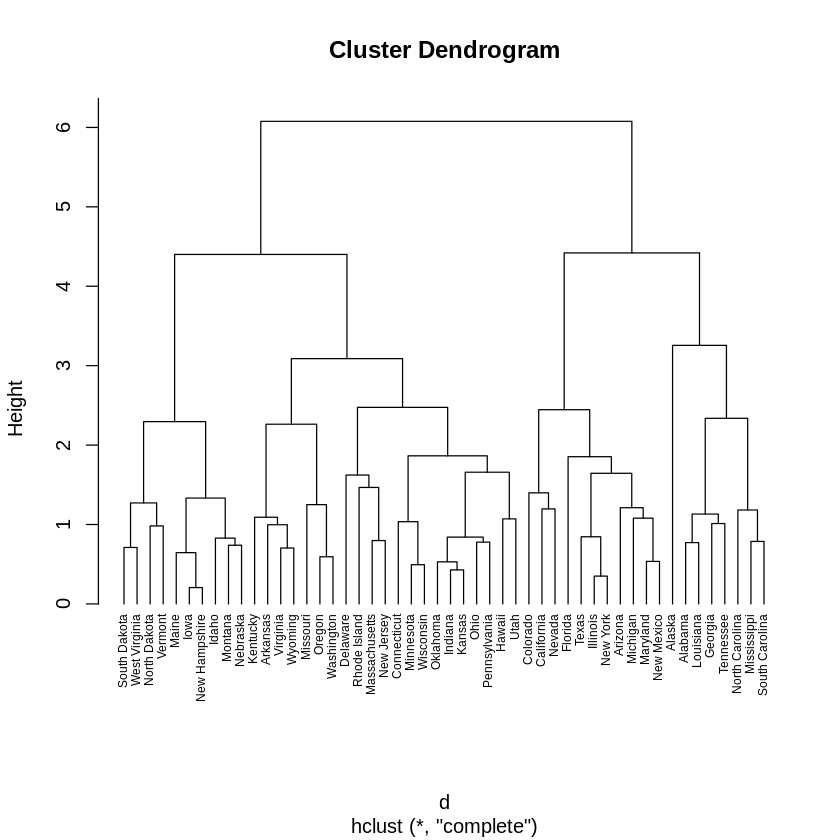

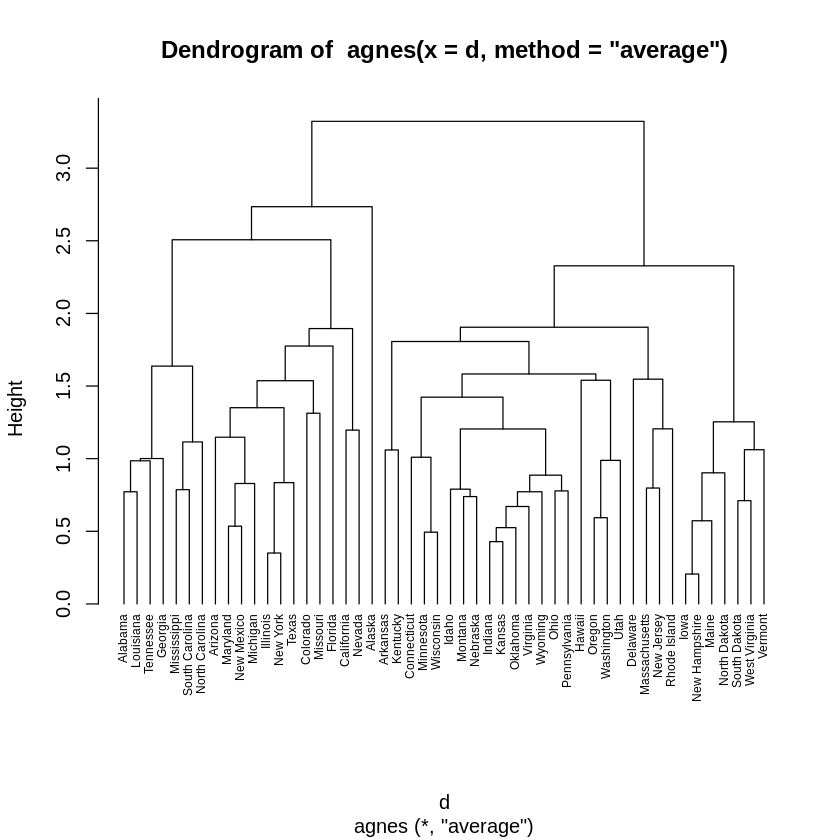

In [5]:
hc1_euclidean_complete <- hclust(d, method = "complete")
hc2_euclidean_average <- agnes(d, method = "average")

plot(hc1_euclidean_complete, cex = 0.6, hang = -1)
pltree(hc2_euclidean_average, cex = 0.6, hang = -1)

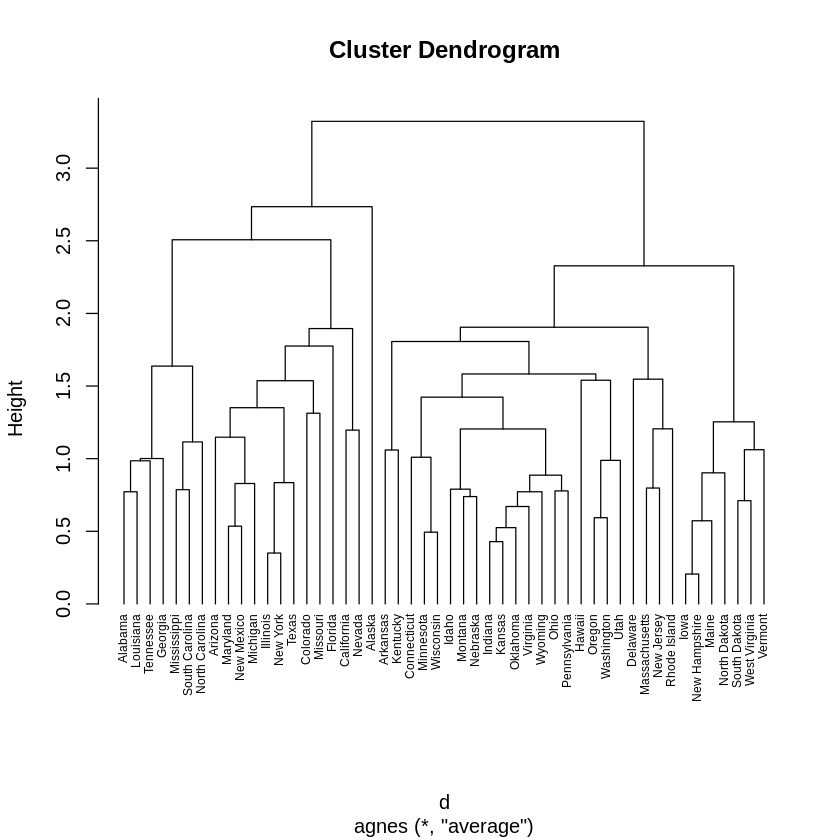

In [7]:
hc3_euclidean_average <- as.hclust(hc2_euclidean_average)
plot(hc3_euclidean_average, cex = 0.6, hang = -1)

**Validación de los dendrogramas**

Para validar que el dendrograma refleja las distancias originales, podemos utilizar el *cophenetic coefficient* que es igual al coeficiente de correlación entre las distancias originales y de *cophenetic*. La función *cophenetic()* devuelve las distancias de *cophenetic* que se derivan del dendrograma. La función *cor* devuelve el coeficiente de correlación entre los valores que se pasan como argumento.

Podemos comparar los dendrogramas generados anteriormente usando los correspondientes *cophenetic coefficient*. En este caso, los dos dendrogramas son similares.

In [8]:
c1 <- cophenetic(hc1_euclidean_complete)
c2 <- cophenetic(hc2_euclidean_average)

cor(d, c1)
cor(d, c2)

[1] 0.6979437

[1] 0.7180382

**Obteniendo clusters desde el dendrograma**

Para obtener clusters desde el dendrograma, debemos cortar este con la función *cutree()* del paquete dendextend. Debemos especificar el número de clusters que deseamos obtener. La función *cutree()* devuelve un vector entero con el índice del cluster al que pertenece cada objeto. Podemos ver cuántos objetos pertenecen a cada cluster con la función *table()*.

In [9]:
clusters <- cutree(hc1_euclidean_complete, k = 4)
clusters
table(clusters)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              4              2              3              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              4              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             4              4              2              4              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              4              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             4              1              2              3              4 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              4              3              3

clusters
 1  2  3  4 
 8 11 21 10 

**Mostrando los clusters sobre el dendrograma**

Podemos mostrar los clusters sobre el dendrograma usando la función *fviz_dend* del paquete factoextra. Debemos indicar el dendrograma, el número de clusters y el valor de otros argumentos necesarios para dibujar el agrupamiento. El dendrograma puede mostrarse en horizontal, vertical o circular.

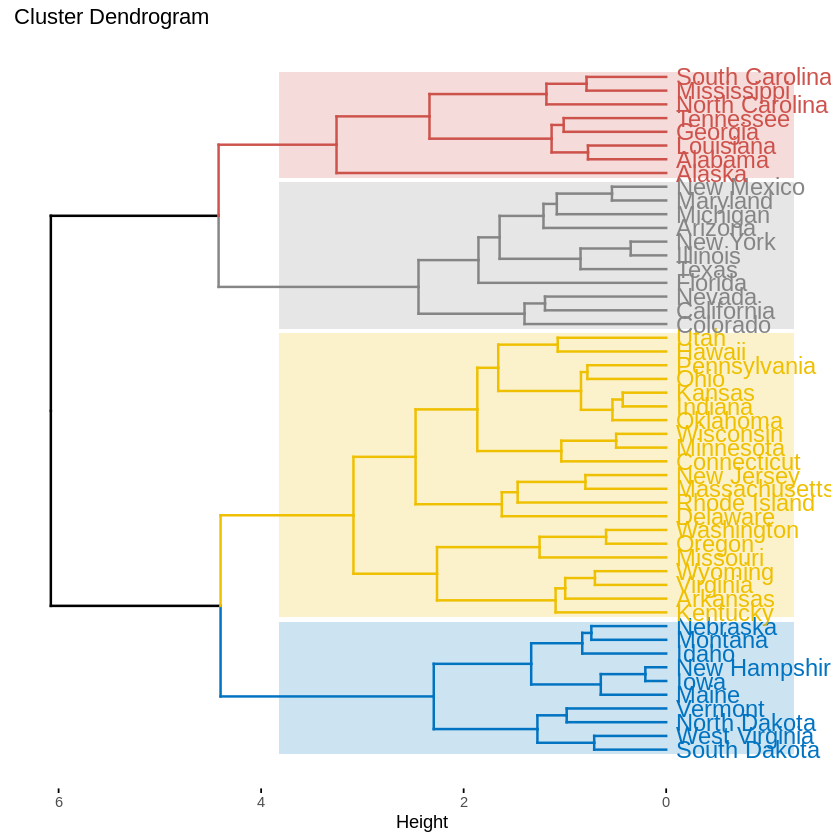

In [10]:
fviz_dend(hc1_euclidean_complete,  k = 4, horiz = TRUE, rect = TRUE, rect_fill = TRUE, rect_border = "jco", k_colors = "jco", cex = 1)

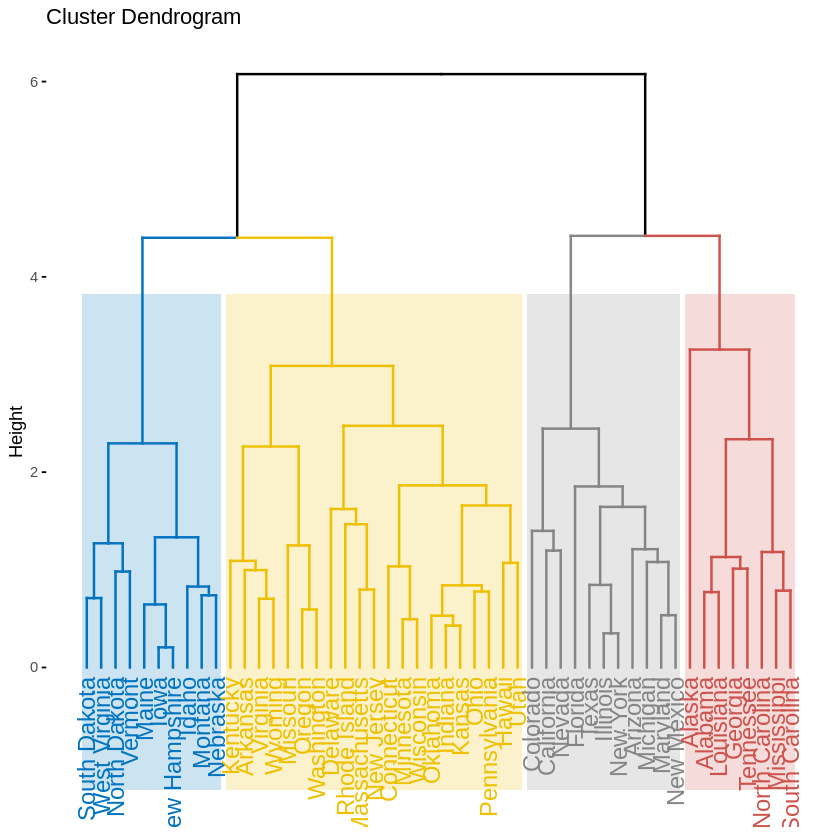

In [11]:
fviz_dend(hc1_euclidean_complete,  k = 4, rect = TRUE, rect_fill = TRUE, rect_border = "jco", k_colors = "jco", cex = 1)

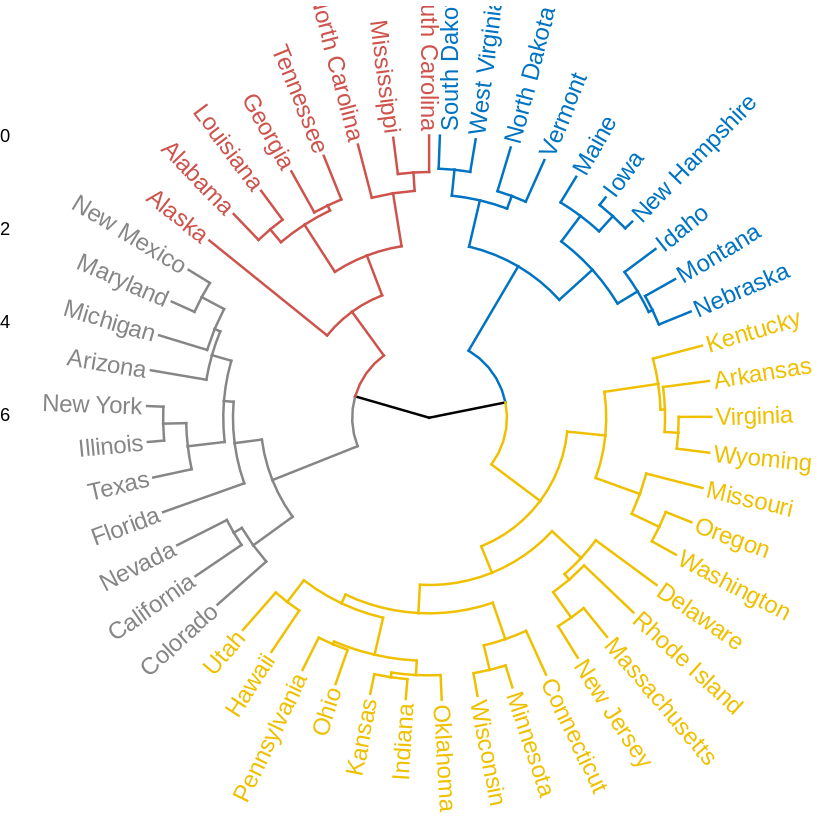

In [12]:
fviz_dend(hc1_euclidean_complete, k = 4, type = "circular", k_colors = "jco", cex = 1)

# **Tareas**

1.   Obtener los dendrogramas usando los métodos *single*, *centroid* y *ward*.
2.   ¿Con qué método se preservan mejor las distancias originales?
3.   Obtener un agrupamiento con 8 clusters usando uno de los dendrogramas obtenidos.
4.   Dibujar sobre el dendrograma los clusters obtenidos.
5.   Describir los clusters obtenidos.



<h1> Task 1 </h1>

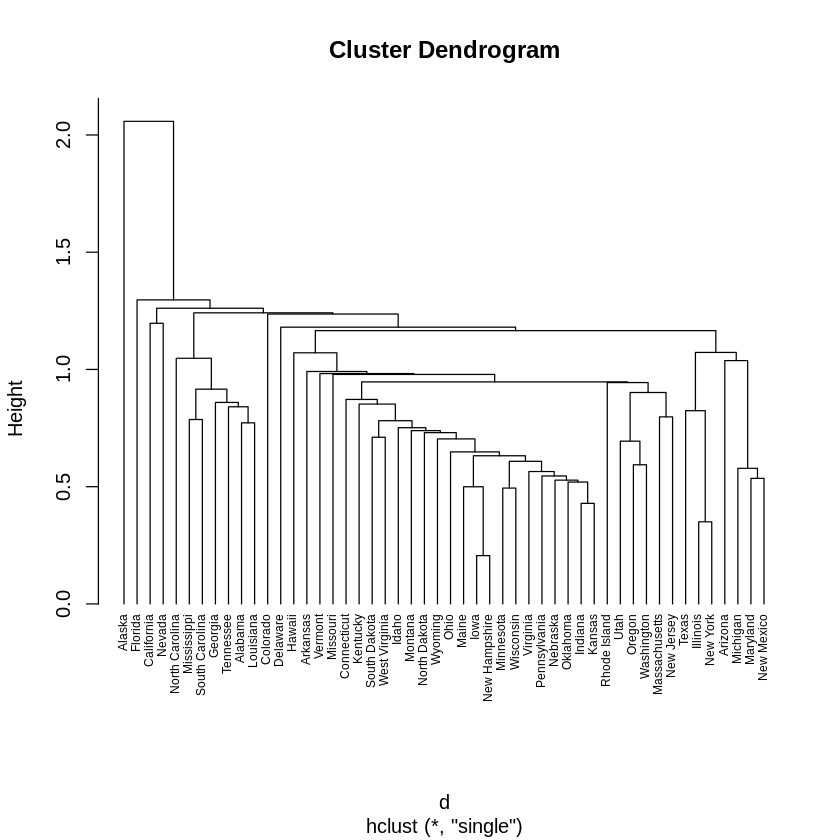

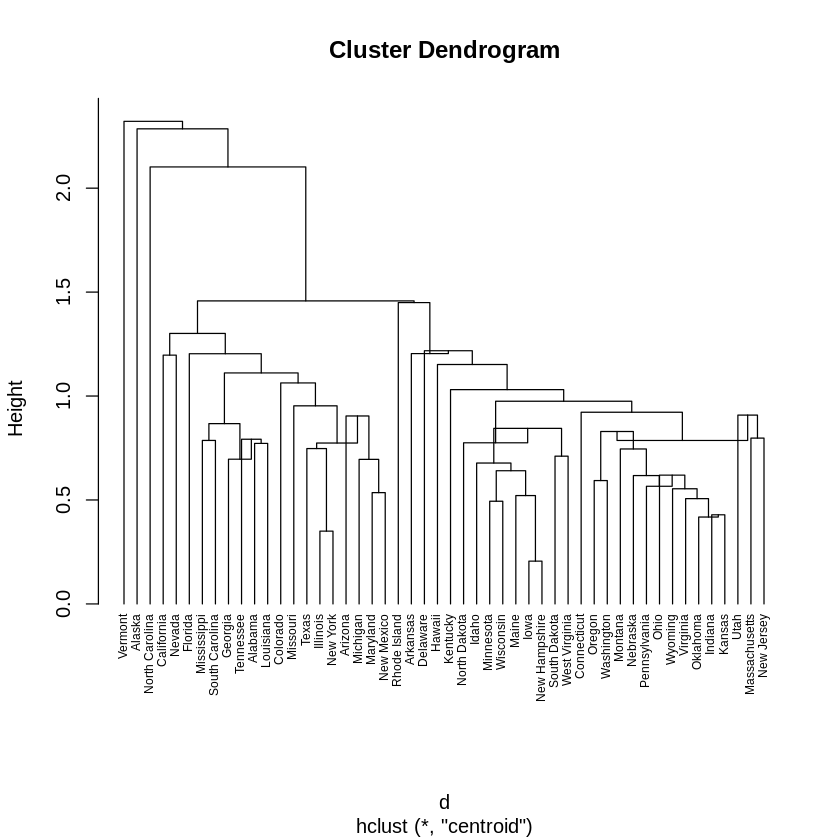

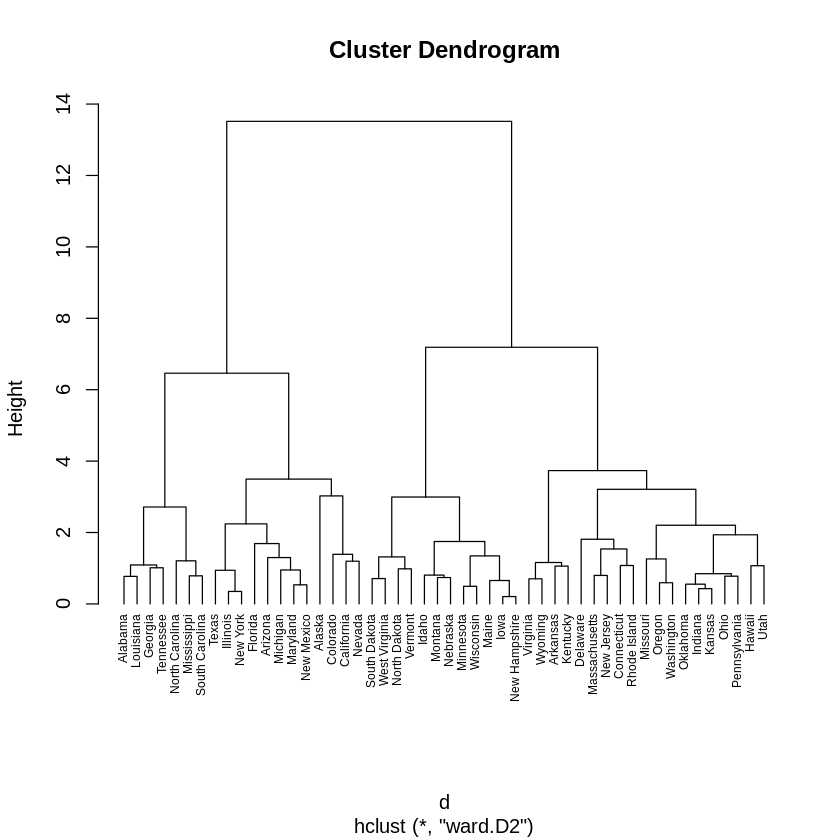

In [21]:
# Obtain the dendograms using the single, centroid and ward methods.

single_euc <- hclust(d, method = "single")
centroid_euc <- hclust(d, method = "centroid")
ward_euc <- hclust(d, method = "ward.D2")

plot(single_euc, cex=0.6, hang = -1)
plot(centroid_euc, cex=0.6, hang = -1)
plot(ward_euc, cex=0.6, hang = -1)

<h1> Task 2 </h1>

In [29]:
# By what method are the original distances best preserved?

single_c = cophenetic(single_euc)
centroid_c = cophenetic(centroid_euc)
ward_c = cophenetic(ward_euc)

cor(d, c1) # Complete
cor(d, c2) # Average
cor(d, single_c) # Single
cor(d, centroid_c) # Centroid
cor(d, ward_c) # Ward

[1] 0.6979437

[1] 0.7180382

[1] 0.541272

[1] 0.6074717

[1] 0.6975266

We use the correlation to check which method best preserves the original distance. We used three different methods; single, centroid and ward. Out of these three, ward preserved the original distances best, and got the highest correlation of 0.6975. Even though ward did better than centroid and single, complete and average still beat ward with correlations of 0.6979 and 0.7180

<h1> Task 3</h1>

In [35]:
# Obtain a grouping with 8 clusters using one of the dendrograms obtained.

cluster_task3 <- cutree(ward_euc, k=8)
cluster_task3
table(cluster_task3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              2              3              4              5 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             5              6              6              3              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             7              8              3              7              8 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             7              4              1              8              3 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             6              3              8              1              7 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             8              8              5              8              6 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             3              3              1              8              7 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             7              7              7              6              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             8              1              3              7              8 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             4              7              8              8              4

cluster_task3
 1  2  3  4  5  6  7  8 
 7  1  8  4  3  5 10 12 

Chose to go with the ward method as this performed best in task 2.

<h1> Task 4 </h1>

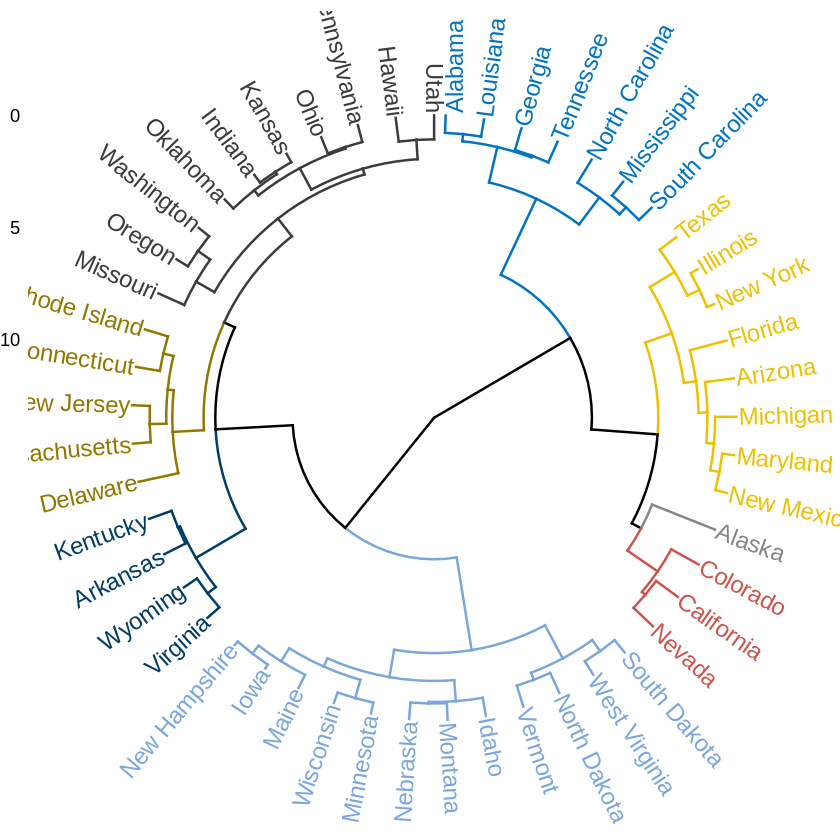

In [37]:
# Draw the clusters obtained on the dendrogram.

fviz_dend(ward_euc, k = 8, type = "circular", k_colors = "jco", cex = 1)

<h1> Task 5 </h1>

In [ ]:
# Describe the clusters obtained. 

As we can see in the dendrogram above, there are 8 clusters from the data. The interesting part is that one of the clusters consists only of Alaska by itself. All the other clusters have between 3-12 items. Alaska is being matched with a cluster containing three items, Colorado, California and Nevada. This might be because that cluster is a bad grouping or that these items are very unique compared to the other items in the dataset.